In [13]:
from hmmlearn import hmm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
np.set_printoptions(precision=3)
plt.rcParams['font.family'] = 'NanumGothic'

In [14]:
df = pd.read_csv('data/Volume_ECU16.csv', index_col=0, parse_dates=True)

# 매수/매도 비율
data = np.array(df['buy/sell'])  # (122,)
data = np.reshape(data, (data.shape[0], 1))  #  (122,1)

num_state = 4

model = hmm.GaussianHMM(n_components=num_state, tol=0.00001, n_iter=10000)
model.fit(data)

pred_hidden= model.predict(data)

mu = model.means_  
sigma = np.array([np.sqrt(x) for x in model.covars_])  #(4,1,1)
sigma = np.reshape(sigma, (num_state,1)) #(4,1)
transition_prob = model.transmat_

print("\n**mu**\n", mu)
print("\n**vol**\n", sigma)
print("\n**Transition**\n", transition_prob)


**mu**
 [[0.726]
 [1.845]
 [1.279]
 [2.876]]

**vol**
 [[0.218]
 [0.179]
 [0.178]
 [0.256]]

**Transition**
 [[6.915e-001 4.735e-002 2.459e-001 1.534e-002]
 [1.829e-001 2.713e-001 5.019e-001 4.397e-002]
 [4.462e-001 2.388e-001 2.241e-001 9.095e-002]
 [2.102e-075 1.944e-001 8.056e-001 2.731e-223]]


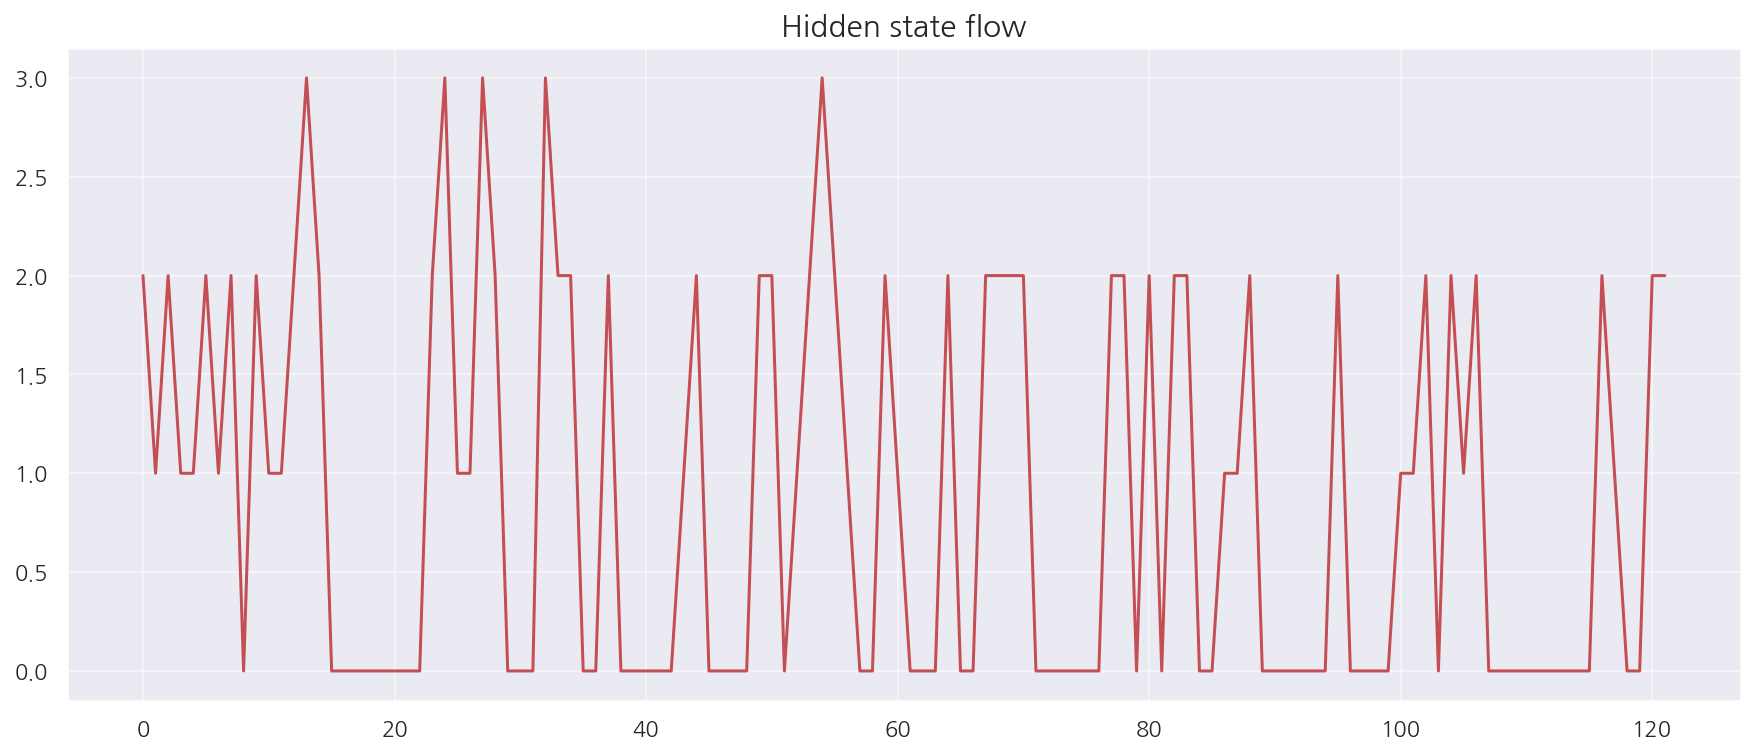

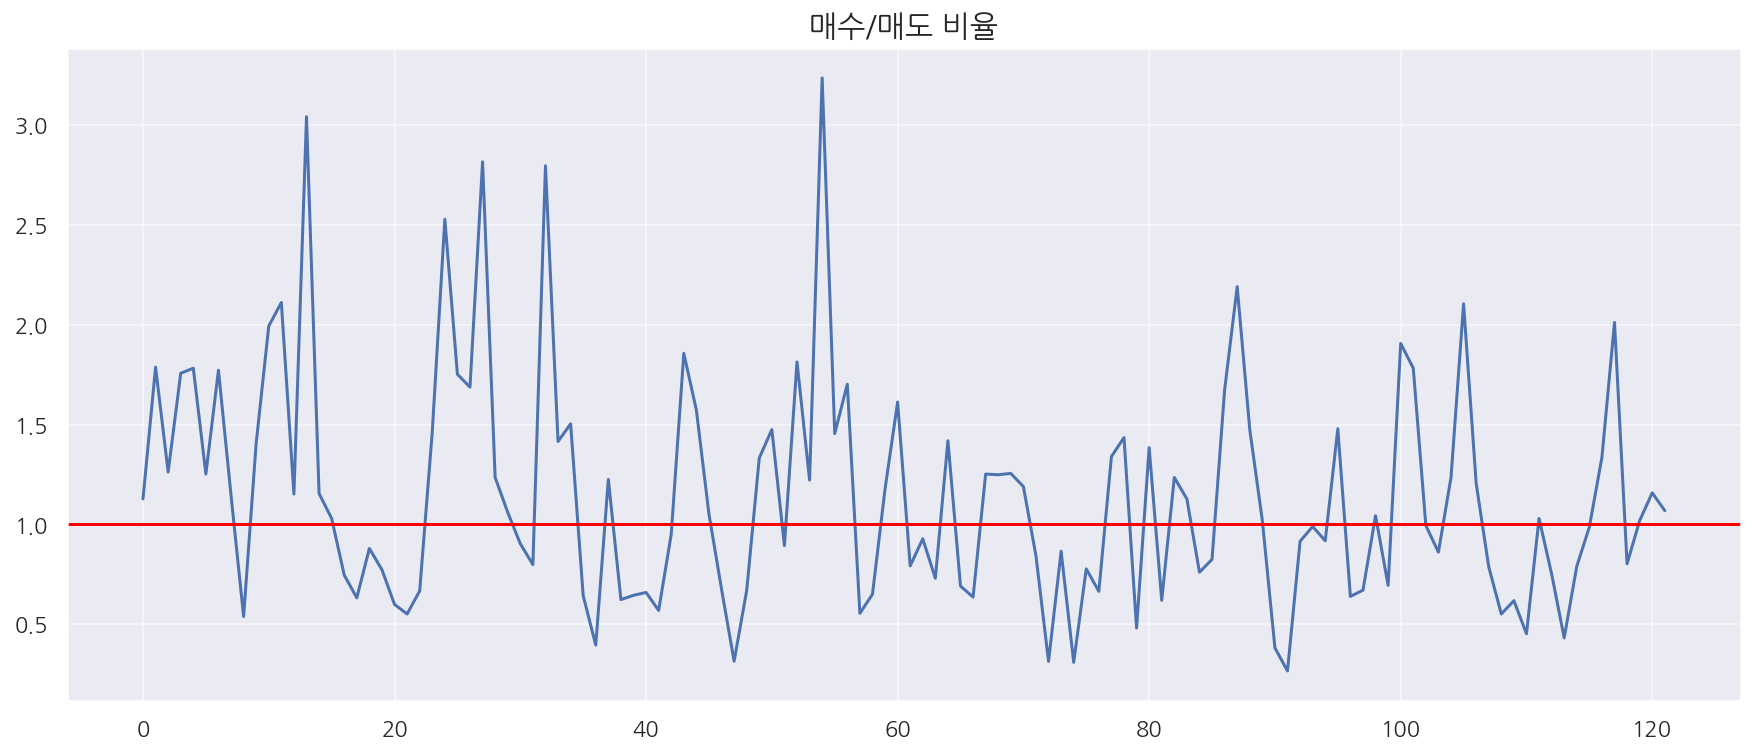

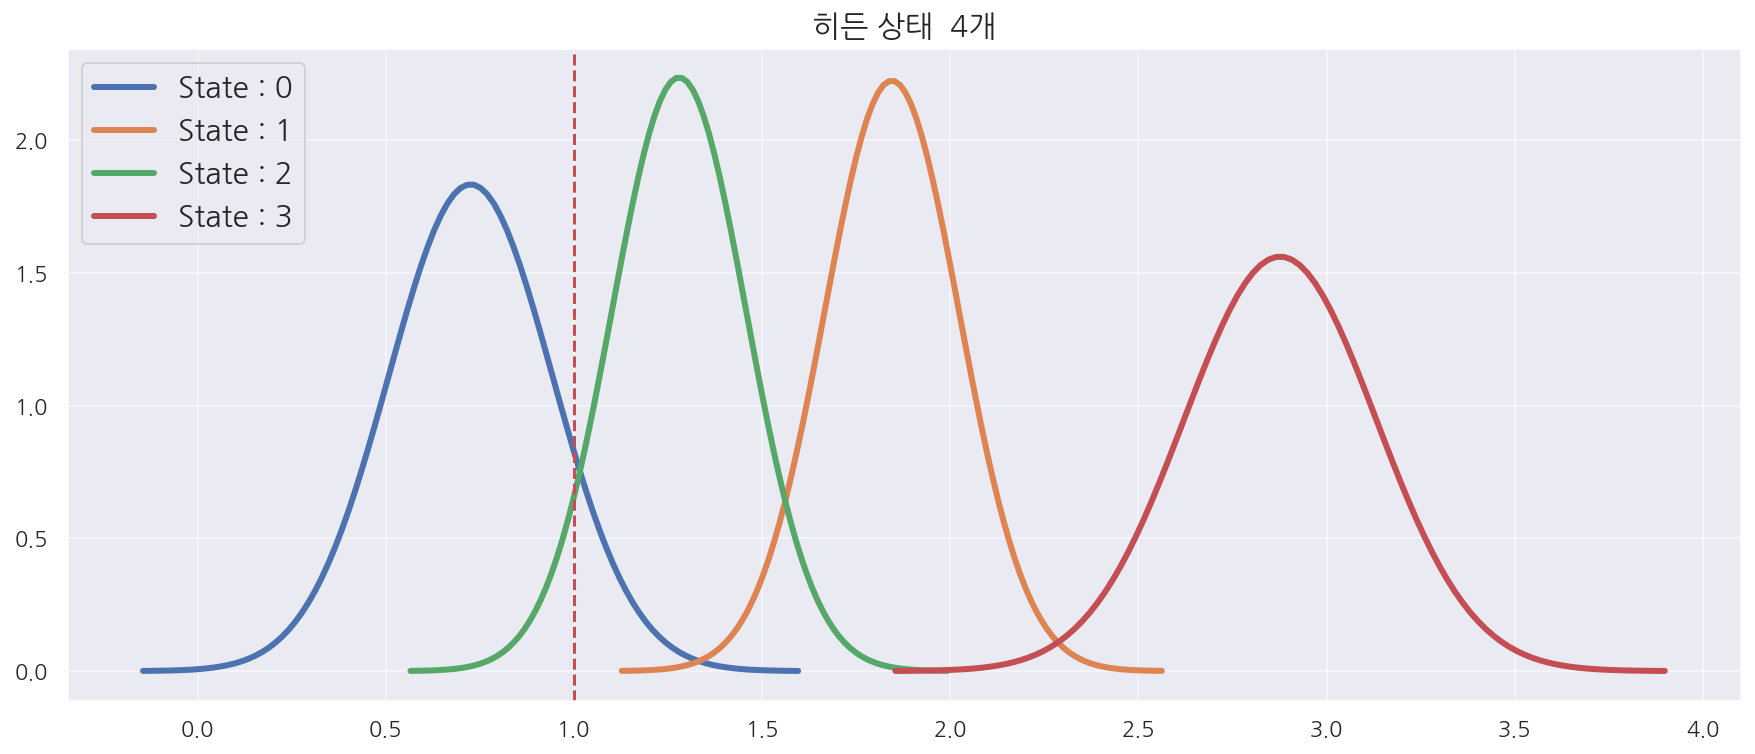

State 0 : 51.63934426229508%
State 1 : 14.754098360655737%
State 2 : 29.508196721311474%
State 3 : 4.098360655737705%


In [19]:
plt.figure(figsize=(15,6))
plt.plot(pred_hidden, 'r-')
plt.title("Hidden state flow", fontsize=15)
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(15,6))
plt.plot(data)
plt.title("매수/매도 비율", fontsize=15)
plt.axhline(y=1.0, color='red')
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(15,6))
for i in range(num_state):
    x = np.linspace(mu[i] -4*sigma[i], mu[i] +4*sigma[i], 100)
    plt.plot(x, sp.stats.norm.pdf(x, mu[i], sigma[i]), linewidth=3, label='State : '+str(i))
plt.title(f"히든 상태  {num_state}개", fontsize=15)
plt.axvline(x=1, color='r', linestyle='--')
plt.legend(loc='upper left', fontsize=15)
plt.grid(True, alpha=0.5)
plt.show()

for i in range(num_state):
    prob = len(np.where(pred_hidden == i)[0]) / len(pred_hidden)
    print(f"State {i} : {prob * 100}"+'%')